# Lab 10 Tasks - Solution

In this we will look at using superised machine learning algorithms to predict music genres. Specficially, the objective here is to classify the genre of a song from Spotify, based on a range of associated audio features.

Each song in our dataset is described by a range of features:
- artist_name: Song artist 
- track_name: Song track name
- acousticness: Describes the likelihood that the song is purely acoustic
- danceability: Describes how suitable a track is for dancing based on a combination of elements including tempo, rhythm stability, beat strength, and overall regularity
- energy: A perceptual measure of intensity and activity. More energetic tracks feel fast, loud, and noisy
- instrumentalness: Indicates whether a song includes vocals or not
- liveness: Describes the likelihood that the song was recorded with a live audience.
- loudness: Overall loudness of a track in decibels (dB), averaged across the entire track
- speechiness:  Describes the likelihood that the song contains spoken words
- tempo: Estimated tempo of a track in beats per minute (BPM)
- valence: Tracks with high valence sound more positive (e.g. cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, angry)
- genre: Target label ('Pop' or 'Rock' in this case)

Original dataset source: 
https://www.kaggle.com/code/iqbalbasyar/spotify-genre-classification/data

Original Spotify documentation:
https://developer.spotify.com/discover/

In [88]:
import pandas as pd
from sklearn.model_selection import cross_val_score
# imports for plotting
import matplotlib
import matplotlib.pyplot as plt

## Task 1

Load the dataset from the file 'music.csv' and examine the number of songs having each target label.

In [89]:
df = pd.read_csv("music.csv")
df.head()

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,Led Zeppelin,Black Dog,27.40000,43.2,84.8,3.44000,23.30,-8.095,8.78,81.201,74.3,Rock
1,Mike Posner,Song About You,18.00000,67.6,84.9,0.00237,9.98,-3.008,4.12,87.025,64.1,Pop
2,Van Morrison,Days Like This,65.80000,66.0,54.1,0.12700,9.28,-7.851,5.76,93.744,69.3,Rock
3,The 1975,Give Yourself A Try,0.00306,31.3,80.0,0.00000,49.70,-5.011,6.83,183.047,87.1,Rock
4,HUNNY,Parking Lot,0.30300,49.8,84.4,0.00000,35.50,-5.163,4.74,103.970,46.9,Rock


In [90]:
# check the number with each class label
df["genre"].value_counts()

genre
Rock    1250
Pop     1250
Name: count, dtype: int64

Remove any non-numeric features from the dataset, and then separate out the features to use for classification from the target label information.

In [91]:
# remove the non-numeric features
df.drop(["artist_name", "track_name"], axis=1, inplace=True)
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,27.40000,43.2,84.8,3.44000,23.30,-8.095,8.78,81.201,74.3,Rock
1,18.00000,67.6,84.9,0.00237,9.98,-3.008,4.12,87.025,64.1,Pop
2,65.80000,66.0,54.1,0.12700,9.28,-7.851,5.76,93.744,69.3,Rock
3,0.00306,31.3,80.0,0.00000,49.70,-5.011,6.83,183.047,87.1,Rock
4,0.30300,49.8,84.4,0.00000,35.50,-5.163,4.74,103.970,46.9,Rock


In [92]:
# the target label
target = df["genre"]
# remove the target label, giving us just the numeric feratures for classification
data = df.drop("genre", axis=1).copy()

## Task 2

Generate a 60/40 random training and test split of the data. Based on this split, evaluate the accuracy and F1-score achieved by a KNN classifier (for *k=1* neighbour). 

In [93]:
from sklearn.model_selection import train_test_split
# use 60% for training, 40% for testing
data_train, data_test, target_train, target_test = train_test_split(data, target, 
    test_size=0.4, random_state=1)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 1500 examples
Test set has 1000 examples


In [94]:
# train the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
m = knn.fit(data_train, target_train)
# make predictions for the test set
predicted = knn.predict(data_test)

In [95]:
# evaluate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(target_test, predicted)
print("Accuracy=%.3f" % acc)
# evalaute F1 score
from sklearn.metrics import f1_score
print("F1(Rock) = %.3f" % f1_score(target_test, predicted, pos_label="Rock") )
print("F1(Pop) = %.3f" % f1_score(target_test, predicted, pos_label="Pop") )

Accuracy=0.615
F1(Rock) = 0.618
F1(Pop) = 0.612


Use a *confusion matrix* to illustrate where the errors lie with the classifier above.

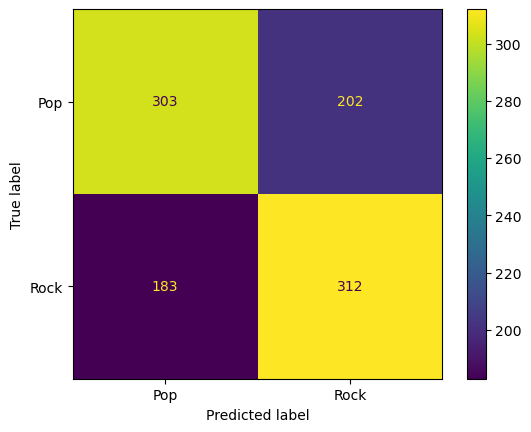

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# build the confusion matrix
cm = confusion_matrix(target_test, predicted)
# display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

## Task 3



Use 5-fold cross-validation to evaluate the accuracy achieved by a KNN (*k=1*) classifier on the data.

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
fold_scores = cross_val_score(knn, data, target, cv=5, scoring="accuracy")
mean_accuracies = {1: fold_scores.mean()}
print("KNN (k=1): Mean cross-validation accuracy = %.3f" % mean_accuracies[1])

KNN (k=1): Mean cross-validation accuracy = 0.616


Repeat the process above for different parameter values of *k*, from 2 to 10 neighbours. Generate a plot of the different accuracy values acheived for different values of *k*. Which value of *k* yields the highest accuracy?

In [98]:
for k in range(2,11):
    # apply KNN for the specified value
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, data, target, cv=5, scoring="accuracy")
    mean_accuracies[k] = fold_scores.mean()

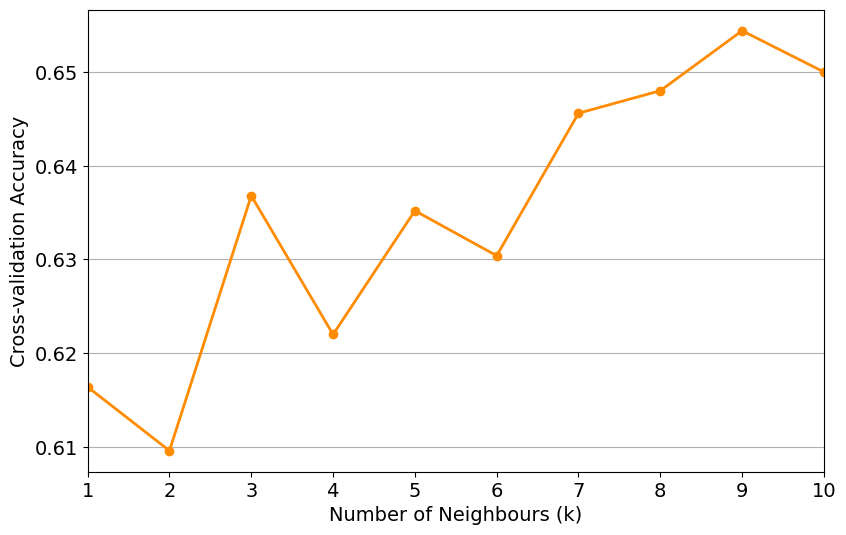

In [99]:
# generate the plot
df_mean_accuracies = pd.Series(mean_accuracies)
ax = df_mean_accuracies.plot(figsize=(9.5,6), fontsize=14, lw=2, marker='o', color="darkorange")
ax.set_ylabel("Cross-validation Accuracy", fontsize=14)
ax.set_xlabel("Number of Neighbours (k)", fontsize=14)
ax.yaxis.grid()
ax.set_xlim(1, 10)
plt.show()

In [100]:
# sort the values to see the parameter giving the highest accuracy
df_sorted = df_mean_accuracies.sort_values(ascending=False)
print(df_sorted)
# get the value of k which gives the highest accuracy
best_k = df_sorted.index[0]
print("Best value is k=%d" % best_k)

9     0.6544
10    0.6500
8     0.6480
7     0.6456
3     0.6368
5     0.6352
6     0.6304
4     0.6220
1     0.6164
2     0.6096
dtype: float64
Best value is k=9


## Task 4

For certain datasets, classification may work better on a subset of features, rather than on the entire feature set (e.g. when noisy or misleading features are removed).

Using the KNN and the best value of *k* identified in Task 3, compare classification performance for the three feature subsets in the lists below. Which subset gives the highest accuracy?

In [101]:
subset1 = ['danceability', 'energy', 'tempo', 'valence']
subset2 = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']
subset3 = ['energy', 'tempo', 'valence', 'loudness']

In [102]:
# try the first subset of features
data1 = data[subset1]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data1, target, cv=5, scoring="accuracy")
mean_acc1 = fold_scores.mean()
print("Subset 1 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc1))

Subset 1 - KNN (k=9): Mean cross-validation accuracy = 0.658


In [103]:
# try the second subset of features
data2 = data[subset2]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data2, target, cv=5, scoring="accuracy")
mean_acc2 = fold_scores.mean()
print("Subset 2 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc2))

Subset 2 - KNN (k=9): Mean cross-validation accuracy = 0.624


In [104]:
# try the third subset of features
data3 = data[subset3]
knn = KNeighborsClassifier(n_neighbors=best_k)
fold_scores = cross_val_score(knn, data3, target, cv=5, scoring="accuracy")
mean_acc3 = fold_scores.mean()
print("Subset 3 - KNN (k=%d): Mean cross-validation accuracy = %.3f" % (best_k, mean_acc3))

Subset 3 - KNN (k=9): Mean cross-validation accuracy = 0.548
